In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [22]:
#loaded Data
file_path = '../data/raw/raw_analyst_ratings.csv'

df = pd.read_csv(file_path)
# Preview the data
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [23]:
#get info about the data
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [24]:
# check for null
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [25]:
# get headlines and their counts
# Count the occurrences of each headline
headline_counts = df['headline'].value_counts()

print(headline_counts)

headline
Benzinga's Top Upgrades                                                                             5449
Benzinga's Top Downgrades                                                                           5372
Benzinga's Top Initiations                                                                          4241
Stocks That Hit 52-Week Lows On Thursday                                                            3962
Morning Market Losers                                                                               3440
                                                                                                    ... 
China Zenix Auto Wins Supply Contract With Cargotec to Supply Tubeless Steel Wheels                    1
China Zenix Auto Awarded Supply Contract With FAW                                                      1
Zenix Auto Developing Aluminum Wheel For Yutong's New Energy Bus                                       1
China Zenix Auto International Announces Crowe

In [26]:

print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


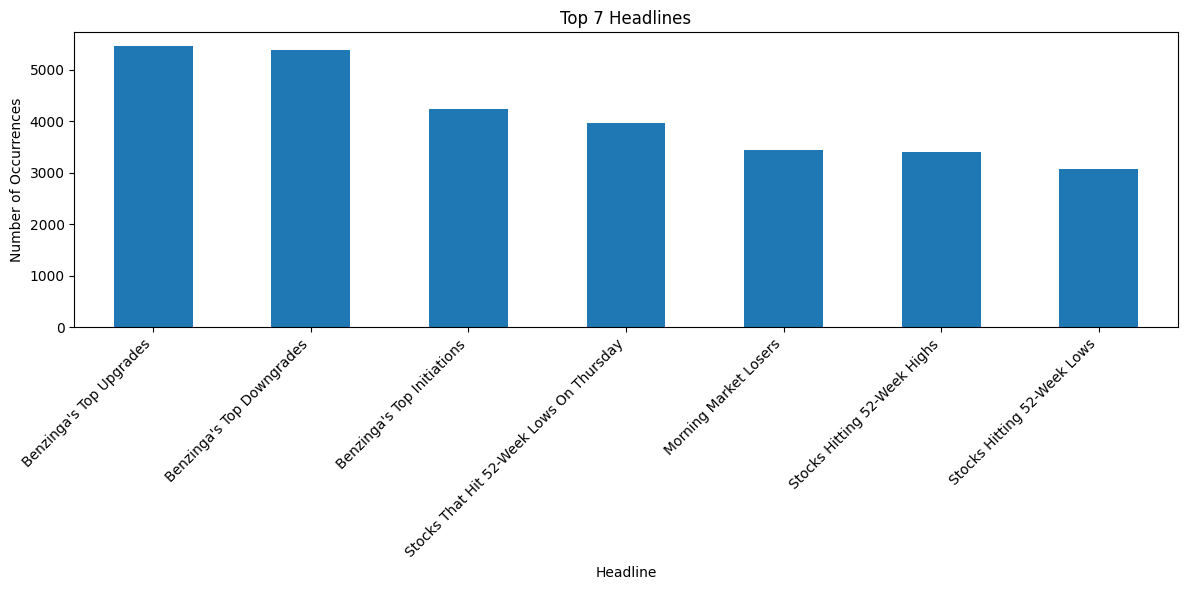

In [27]:
# Get the top 7 headlines
top_7_headlines = headline_counts.head(7)

# Create a bar chart for the top 7 headlines
plt.figure(figsize=(12, 6))
top_7_headlines.plot(kind='bar')
plt.title('Top 7 Headlines')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

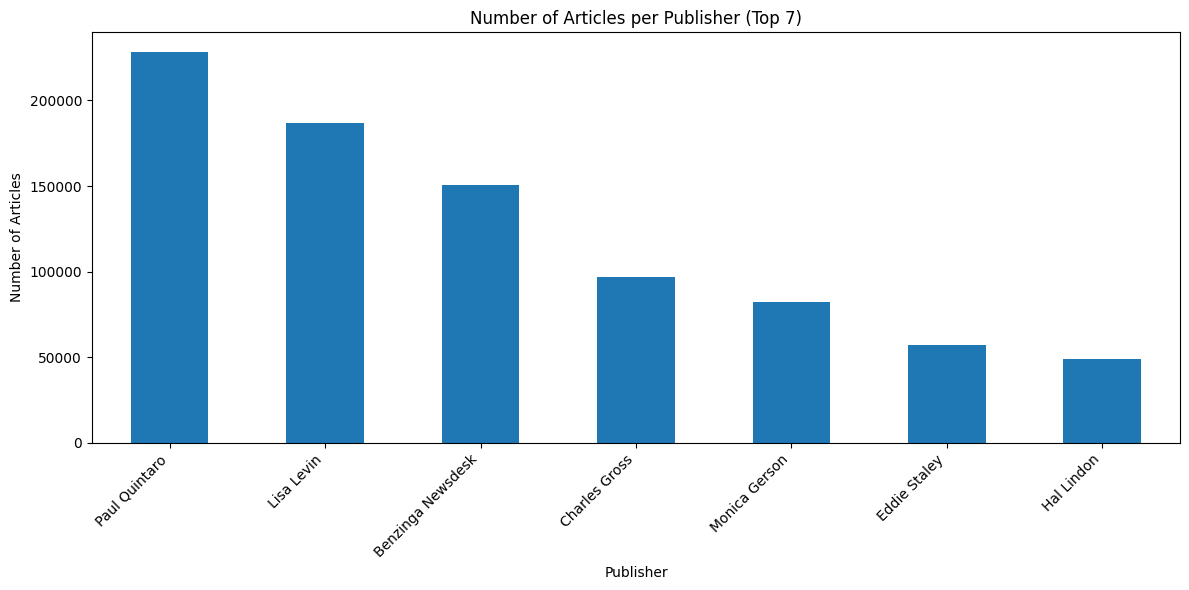

In [28]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Get the top 7 publishers
top_7_publishers = publisher_counts.head(7)

# Create a bar chart for the top 7
plt.figure(figsize=(12, 6))
top_7_publishers.plot(kind='bar')
plt.title('Number of Articles per Publisher (Top 7)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


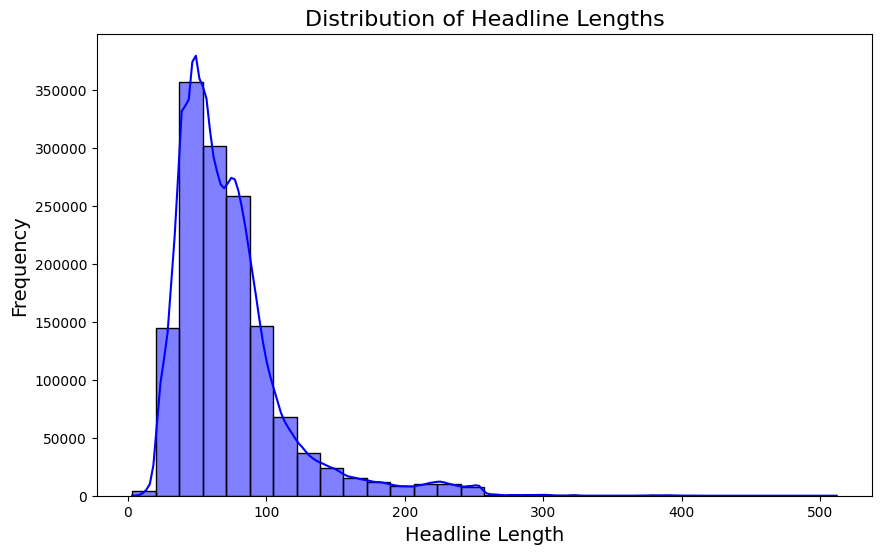

In [30]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)

# Compute statistics for headline lengths
length_stats = df['headline_length'].describe()
print(length_stats)

# Plot distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [34]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

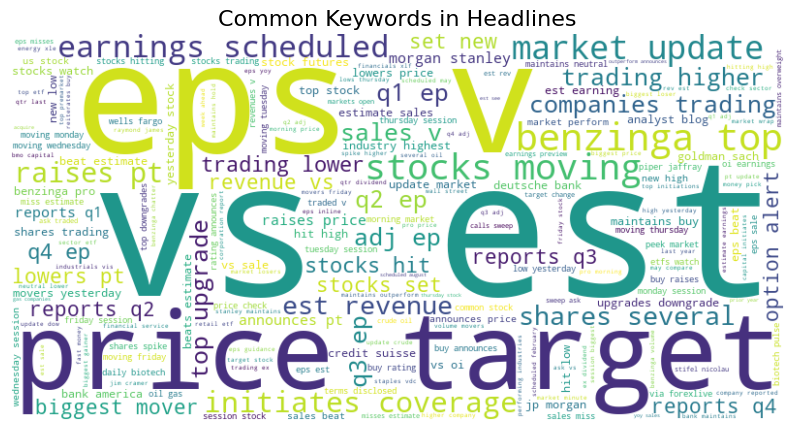

In [35]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your existing code:
stop_words = set(stopwords.words('english'))

df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

all_tokens = [token for tokens in df['tokens'] for token in tokens]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Headlines', fontsize=16)
plt.show()


In [38]:
# Parse dates from the 'date' column
df['parse_date'] = pd.to_datetime(df['date'], errors='coerce')

# Confirm the column is created
print(df['parse_date'].head())


0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: parse_date, dtype: datetime64[ns, UTC-04:00]


Headline Length Descriptive Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


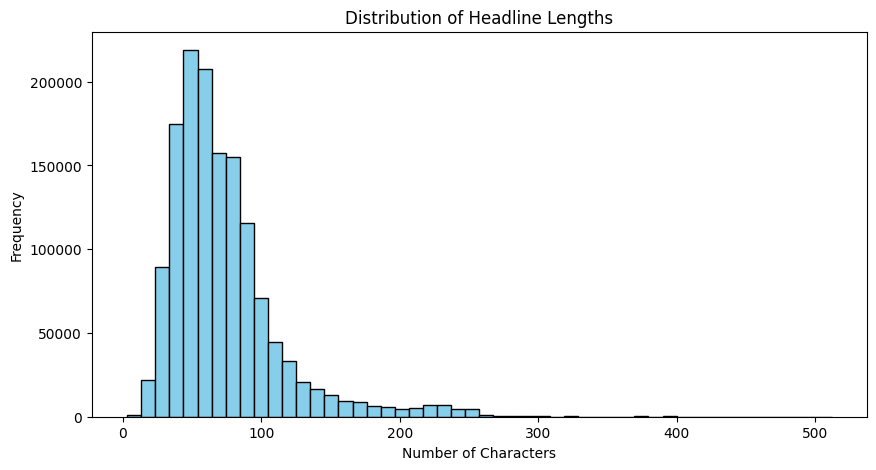


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


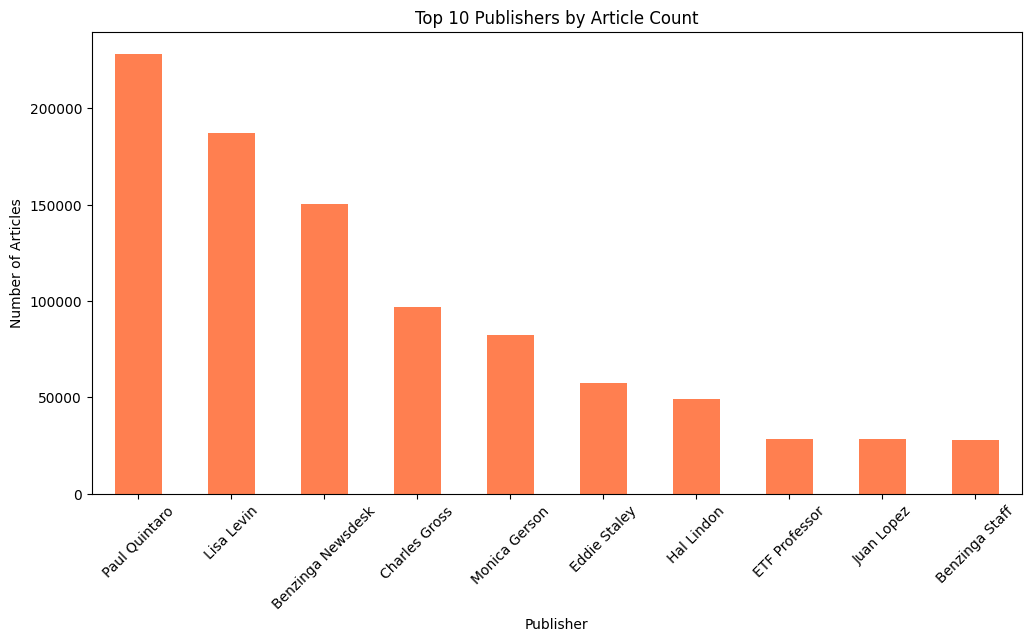


Number of Articles Published per Day:
parse_date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
2011-05-03    3
2011-05-05    3
2011-05-06    3
2011-05-07    2
2011-05-09    3
2011-05-11    3
2011-05-12    1
2011-05-13    4
2011-05-15    1
2011-05-16    4
2011-05-17    3
2011-05-18    3
2011-05-19    2
2011-05-20    1
dtype: int64


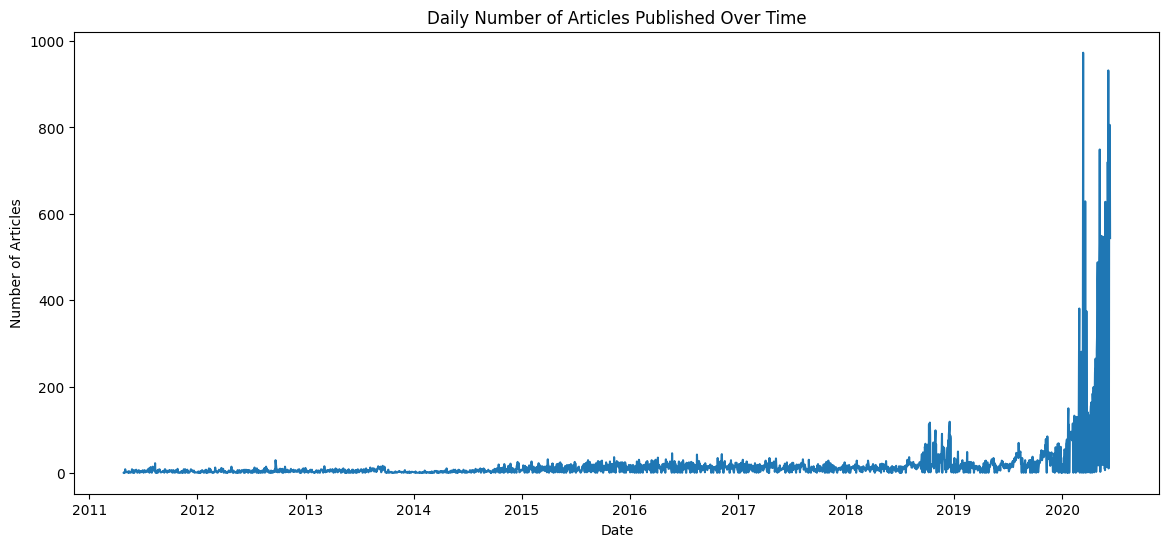

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descriptive statistics for headline lengths
df['headline_length'] = df['headline'].str.len()
print("Headline Length Descriptive Statistics:")
print(df['headline_length'].describe())

# Optional: visualize headline length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['headline_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# 2. Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts.head(20))  # Top 20 publishers

# Optional: bar plot for top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# 3. Analyze publication dates for trends
# Make sure 'parse_date' column is datetime type
df['parse_date'] = pd.to_datetime(df['parse_date'], errors='coerce')

# Count articles by day
daily_counts = df.groupby(df['parse_date'].dt.date).size()

print("\nNumber of Articles Published per Day:")
print(daily_counts.head(20))  # First 20 days

# Optional: plot articles over time (daily)
plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('Daily Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
